In [1]:
from osgeo import gdal
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
from matplotlib import animation
import os
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal.lib
import pysal.model
from osgeo import gdal
from osgeo import osr



ModuleNotFoundError: No module named 'osgeo'

## 1. data

raster data of bus speed

In [2]:


# Open a raster file
with rasterio.open('D:\CASApre\DataDive2024\hourly_speed_data.tif') as src:
    print(f'Raster shape: {src.shape}')
    print(f'Raster bands: {src.count}')
    print(f'Raster data types: {src.dtypes}')
    print(f'Raster valid data mask: {src.dataset_mask()}')
    print(f'Raster transform (affine transformation matrix): {src.transform}')
    print(f'Raster crs: {src.crs}')

Raster shape: (374, 532)
Raster bands: 1754
Raster data types: ('float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', 'float32', '

Band 1 shape: (374, 532)
Band 1 data type: float32
Band 1 data:
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


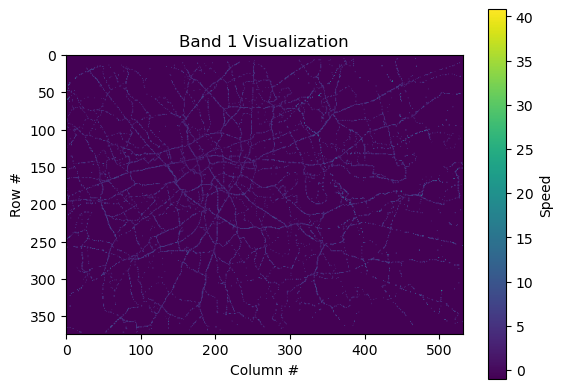

In [10]:
import rasterio


with rasterio.open('D:\CASApre\DataDive2024\hourly_speed_data.tif') as src:

    band1 = src.read(1)  # 1-indexed band number
    
    
    print(f'Band 1 shape: {band1.shape}')
    print(f'Band 1 data type: {band1.dtype}')
    print(f'Band 1 data:\n{band1}')
    
    plt.imshow(band1, cmap='viridis')
    plt.colorbar(label='Speed')
    plt.title('Band 1 Visualization')
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: left cannot be >= right

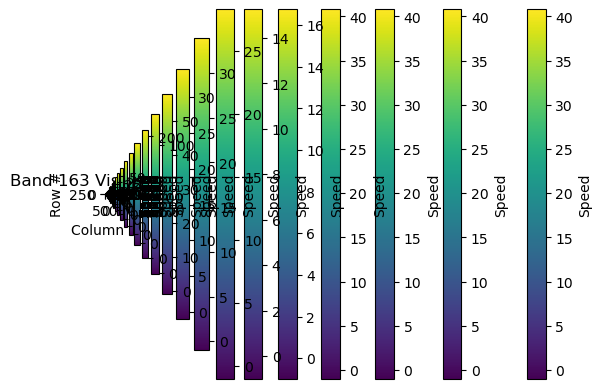

In [5]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the file paths and directories
date_directory = 'D:\CASApre\DataDive2024\\'  # Modify this according to your file structure
files_to_load = ['hourly_speed_data.tif']  # Modify this according to your file structure
visdir = 'path_to_output_directory'  # Modify this according to your preferences

# Open the raster file
with rasterio.open(date_directory + files_to_load[0]) as src:
    fig, ax = plt.subplots()

    # Read all bands
    all_bands = src.read()

    # Function to update the plot for each frame
    def animate(i):
        ax.clear()
        im = ax.imshow(all_bands[i], cmap='viridis')
        ax.set_title(f'Band {i + 1} Visualization')
        ax.set_xlabel('Column #')
        ax.set_ylabel('Row #')
        fig.colorbar(im, ax=ax, label='Speed')
        return [im]

    # Create the animation
    anim = animation.FuncAnimation(fig, animate, frames=all_bands.shape[0], interval=20, blit=True)

    # Save the animation as a GIF
    anim.save(visdir + 'distinctJourneyCounts_mplanimate_20231028.gif', fps=1)


air quality data

In [8]:
df = pd.read_csv('D:\CASApre\CUSP2024\EDA\Data\Waterloo_CE2.csv')

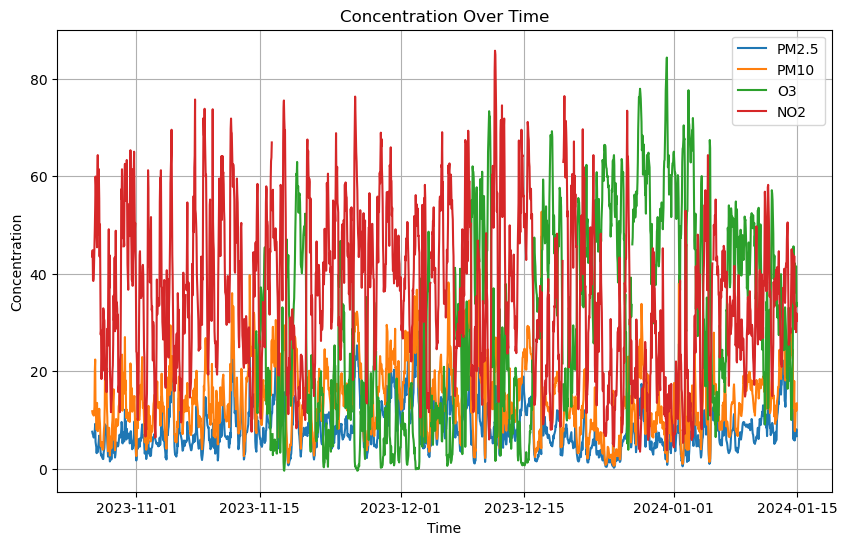

In [9]:
df['time'] = pd.to_datetime(df['time'])

df.set_index('time', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM2.5 Particulate (ug/m3)'], label='PM2.5')
plt.plot(df.index, df['PM10 Particulate (ug/m3)'], label='PM10')
plt.plot(df.index, df['Ozone (ug/m3)'], label='O3')
plt.plot(df.index, df['Nitrogen Dioxide (ug/m3)'], label='NO2')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


driver = gdal.GetDriverByName('GTiff')
dataset = gdal.Open(bus_speed_tiff)
band = dataset.GetRasterBand(1)



transform = dataset.GetGeoTransform()


pixel_width = transform[1]
pixel_height = transform[5]
x_origin = transform[0]
y_origin = transform[3]


proj = dataset.GetProjection()
srs = osr.SpatialReference(wkt=proj)


cols = dataset.RasterXSize
rows = dataset.RasterYSize


data_array = band.ReadAsArray(0, 0, cols, rows)


w = pysal.lib.weights.KNN.from_array(data_array, k=5, transform=transform, ids=no2_data.index.tolist())


y = no2_data['NO2_concentration']
X = data_array.flatten()


model = pysal.model.GWR(y, X, w)


results = model.fit()


residuals = results.resid_response


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(no2_data.geometry.x, no2_data.geometry.y, c=residuals, cmap='coolwarm', s=10)
ax.set_title('GWR Residuals')
plt.show()


print(results.summary())



In [11]:


def stitch_rasters(raster_paths: list[str]) -> np.ndarray:
    """Stitch rasters together into a 3D array

    Args:
        raster_paths (list[str]): ordered list of raster paths to stitch

    Returns:
        np.ndarray: array of shape (n_rasters, height, width)
    """

    arrays = []
    for path in raster_paths:
        with rasterio.open(path, "r") as src:
            arrays.append(src.read(1))
    return np.stack(arrays)


def get_raster_path_by_time(
    year: int, month: int, day: int, hour: int, type="count"
) -> str:
    """Gets the path to the raster corresponding to a given hour on a given day

    Args:
        year (int): 2023 or 2024
        month (int): month number (1-12)
        day (int): day number (1-31)
        hour (int): hour number (0-23)
        type (str, optional): count data of speed data. Defaults to "count".

    Returns:
        str: inferred path to the raster
    """
    base_dir: str = None
    if type == "count":
        if year == 2023:
            base_dir = "data/london_bus_data/distinctJourneyCounts_London_271023to080124/distinctJourneyCounts/2023"
        else:
            base_dir = "data/london_bus_data/distinctJourneyCounts_London_271023to080124/distinctJourneyCounts/2024"
    else:
        if year == 2023 and month < 12:
            base_dir = "data/london_bus_data/averageSpeeds_London_271023to301123"
        else:
            base_dir = "data/london_bus_data/averageSpeeds_London_011223to080124"

    day_dir = os.path.join(base_dir, str(month), str(day))
    # add leading zeros to hour
    hour_str = str(hour).zfill(2)
    day_str = str(day).zfill(2)
    month_str = str(month).zfill(2)
    return os.path.join(day_dir, f"{year}{month_str}{day_str}{hour_str}_3600_50.gtiff")


def calculate_pct_difference(
    change_arr: np.ndarray, source_arr: np.ndarray
) -> np.ndarray:
    """Calculates the percentage difference between the change array and the
    source array. If the source array is 0, the percentage difference is set to -1.

    Args:
        change_arr (np.ndarray): array to calculate the percentage difference for
        source_arr (np.ndarray): source array

    Returns:
        np.ndarray: array of elementwise percentage difference.
    """
    result_arr = np.zeros(change_arr.shape)
    for row in range(change_arr.shape[0]):
        for col in range(change_arr.shape[1]):
            if source_arr[row, col] == 0:
                result_arr[row, col] = -1
            else:
                result_arr[row, col] = (
                    (change_arr[row, col] - source_arr[row, col]) / source_arr[row, col]
                ) * 100
            result_arr[row, col] = round(result_arr[row, col], 0)
    return result_arr


def save_raster(
    data: np.ndarray, meta: dict, path: str, dtype: str = "float32"
) -> None:
    """Saves a raster to disk

    Args:
        data (np.ndarray): raster data
        meta (dict): raster metadata
        path (str): path to save the raster
        dtype (str, optional): data type of the raster. Defaults to "float32".
    """
    meta.update({"count": 1, "dtype": dtype})
    with rasterio.open(path, "w", **meta) as dst:
        dst.write(data, 1)


def aggergate_by_day(dates: dict, aggregation_method="sum") -> np.ndarray:
    """Aggregates a set of dates into a single array averaged daily.

    Args:
        dates (dict): dictionary containing the dates to aggregate

    Returns:
        np.ndarray: aggregated array
    """
    result_arr = None
    for year in dates:
        for month in dates[year]:
            for day in dates[year][month]:
                day_paths = [
                    get_raster_path_by_time(year, month, day, hour, type="count")
                    for hour in range(24)
                ]
                if aggregation_method == "sum":
                    day_aggregate = stitch_rasters(day_paths).sum(axis=0)
                else:
                    day_aggregate = stitch_rasters(day_paths).mean(axis=0)
                day_aggregate = np.expand_dims(day_aggregate, axis=0)
                if result_arr is None:
                    result_arr = day_aggregate
                else:
                    result_arr = np.concatenate([result_arr, day_aggregate])
    return result_arr.mean(axis=0)


def aggergate_by_hour(dates: dict) -> np.ndarray:
    """Aggregates a set of dates into a single array averaged daily.

    Args:
        dates (dict): dictionary containing the dates to aggregate

    Returns:
        np.ndarray: aggregated array of shape (n_hours, height, width)
    """
    result_arr = None
    for year in dates:
        for month in dates[year]:
            for day in dates[year][month]:
                day_paths = [
                    get_raster_path_by_time(year, month, day, hour, type="count")
                    for hour in range(24)
                ]
                # Shape (1, 24, height, width)
                day_arr = stitch_rasters(day_paths).expand_dims(axis=0)
                if result_arr is None:
                    result_arr = day_arr
                else:
                    result_arr = np.concatenate([result_arr, day_arr])
    return result_arr.mean(axis=0)



In [ ]:

if __name__ == "__main__":
    # protest_raster = stitch_rasters(
    #     get_raster_path_by_time(2023, 12, 16, hour, type="count") for hour in range(24)
    # ).sum(axis=0)

    # comparison_dates = {2023: {12: [2, 9, 23, 30]}}
    # comparison_agg = aggergate_by_day(comparison_dates)
    # pct_diff = calculate_pct_difference(protest_raster, comparison_agg)
    # save_raster(pct_diff, raster_meta, "road_closure.tif")

    pollution_df = pd.read_csv("data/Waterloo_CE2.csv")

    raster_path = get_raster_path_by_time(2023, 12, 7, 12, type="count")
    with rasterio.open(raster_path, "r") as src:
        raster_meta = src.meta
        transform = src.transform
        raster_arr = src.read(1)
    raster_crs = src.meta["crs"]
    # read geojson as gdf
    gdf = gpd.read_file("waterloo_sensor.geojson")
    # Convert crs of gpd
    gdf = gdf.to_crs(raster_crs)

    # Get the values of the raster at the points
    row, col = rasterio.transform.rowcol(transform, gdf.geometry.x, gdf.geometry.y)
    print(row, col)

    arr = np.zeros(raster_arr.shape)
    arr[row, col] = 1
    save_raster(arr, raster_meta, "test.tif", dtype="int32")

In [ ]:

config = dotenv_values(".env")
data_directory = config['DATADIR']
date_directory = data_directory + '\\distinctJourneyCounts\\2023\\10\\28\\'
visdir = config['VISDIR'] + '\\distinctJourneyCounts\\'

files = os.listdir(date_directory)
files_to_load = []
for f in files:
    files_to_load.append(f)
files_to_load.sort()

# Get max value for the files of interest
max_value = 0
for f in files_to_load:
    raster_data = rasterio.open(date_directory + f)
    file_max_value = raster_data.read(1).max()
    if file_max_value > max_value:
        max_value = file_max_value

fig = plt.figure(figsize=(4*raster_data.width/172, 4*raster_data.height/172),
                 dpi=172)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax = plt.subplot(111)
raster_data = rasterio.open(date_directory + files_to_load[0])
im = plt.imshow(raster_data.read(1), cmap='hot', vmin=0, vmax=max_value)
ax.axis('off')
title = ax.text(x=0.5,
        y=0.95,
        s=files_to_load[0].split('_')[0],
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes,
        color='white',
        fontsize=12)

def animate(i):
    a = im.get_array()
    raster_data = rasterio.open(date_directory + files_to_load[i])
    im.set_data(A=raster_data.read(1))
    title.set_text(files_to_load[i].split('_')[0])
    return im,

anim = animation.FuncAnimation(fig, animate, frames=24, interval=20, blit=True)
anim.save(visdir + 'distinctJourneyCounts_mplanimate_20231028.gif',
          fps=1)